In [8]:
import pandas as pd
import numpy as np
import re
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

/Users/mouradchikhi/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import re

# === 1. Chargement des données ===
file_path = 'all_speeches.csv'

try:
    # Charger le fichier CSV
    data = pd.read_csv(file_path, sep=',', encoding='utf-8', engine='python', error_bad_lines=False)
    print("Fichier chargé avec succès !")
except Exception as e:
    print(f"Erreur lors du chargement du fichier : {e}")

# Afficher les 5 premières lignes pour vérifier la structure
display(data.head())

# === 2. Nettoyage des colonnes ===

# Vérification des types de colonnes
print("\n=== Informations sur les colonnes ===")
print(data.info())

# Supprimer les lignes qui n'ont pas de contenu de discours
data = data.dropna(subset=['text'])

# Conversion de la colonne 'date' au format DateTime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Vérification des dates invalides
invalid_dates = data[data['date'].isnull()]
print(f"\n=== Nombres de dates invalides : {len(invalid_dates)} ===")

# Supprimer les discours avec des dates invalides
data = data.dropna(subset=['date'])

# Vérification des valeurs uniques dans la colonne 'country'
print("\n=== Valeurs uniques dans la colonne 'country' ===")
print(data['country'].unique())

# === 3. Nettoyage du texte des discours ===

# Fonction de nettoyage du texte
def clean_text(text):
    if not isinstance(text, str):
        return text
    text = re.sub(r'\s+', ' ', text)  # Remplacer les espaces multiples par un seul espace
    text = re.sub(r'[^a-zA-Z0-9\s\.,!?]', '', text)  # Supprimer les caractères non standards
    text = text.strip()  # Supprimer les espaces en début et fin
    return text

# Appliquer le nettoyage à la colonne 'text'
data['clean_text'] = data['text'].apply(clean_text)

# Afficher quelques exemples de texte nettoyé
print("\n=== Exemples de texte nettoyé ===")
print(data['clean_text'].head(5))

# === 4. Découper les discours en paragraphes ===

# Fonction pour découper un discours en paragraphes
def split_into_paragraphs(text):
    if not isinstance(text, str):
        return []
    paragraphs = re.split(r'\n{2,}|\.\s+', text)  # Découpe sur les paragraphes ou sur les phrases terminées par un point
    paragraphs = [p.strip() for p in paragraphs if len(p.strip()) > 0]
    return paragraphs

# Appliquer la division des paragraphes
data['paragraphs'] = data['clean_text'].apply(split_into_paragraphs)

# Afficher un exemple de paragraphes découpés
print("\n=== Exemple de paragraphes pour un discours ===")
print(data['paragraphs'].iloc[0])

# === 5. Exploration des données ===

# Compter les discours par pays (PAS DE STANDARDISATION DES NOMS DE PAYS)
country_counts = data['country'].value_counts()
print("\n=== Nombre de discours par pays ===")
print(country_counts)

# Vérification des valeurs manquantes
print("\n=== Valeurs manquantes par colonne ===")
print(data.isnull().sum())

# Afficher les premières lignes des données nettoyées
display(data.head())

# === 6. Sauvegarder le DataFrame nettoyé ===
cleaned_file_path = 'all_speeches_cleaned.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"\nFichier nettoyé enregistré sous : {cleaned_file_path}")

Erreur lors du chargement du fichier : read_csv() got an unexpected keyword argument 'error_bad_lines'


,reference,country,date,title,author,is_gov,text,clean_text,paragraphs
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,They would no doubt argue that to have two obj...,[They would no doubt argue that to have two ob...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,Today I wish to talk about real interest rates...,[Today I wish to talk about real interest rate...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,I welcome this opportunity to talk about prosp...,[I welcome this opportunity to talk about pros...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,It is a pleasure to have this opportunity to a...,[It is a pleasure to have this opportunity to ...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...","As a longtime fan of Don Sanders, I am delight...","[As a longtime fan of Don Sanders, I am deligh..."



=== Informations sur les colonnes ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   reference   7721 non-null   object        
 1   country     7721 non-null   object        
 2   date        7721 non-null   datetime64[ns]
 3   title       7721 non-null   object        
 4   author      7721 non-null   object        
 5   is_gov      7721 non-null   int64         
 6   text        7721 non-null   object        
 7   clean_text  7721 non-null   object        
 8   paragraphs  7721 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 543.0+ KB
None

=== Nombres de dates invalides : 0 ===

=== Valeurs uniques dans la colonne 'country' ===
['australia' 'canada' 'euro area' 'japan' 'sweden' 'switzerland'
 'united kingdom' 'united states']

=== Exemples de texte nettoyé ===
0    They would no doubt 

,reference,country,date,title,author,is_gov,text,clean_text,paragraphs
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,They would no doubt argue that to have two obj...,[They would no doubt argue that to have two ob...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,Today I wish to talk about real interest rates...,[Today I wish to talk about real interest rate...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,I welcome this opportunity to talk about prosp...,[I welcome this opportunity to talk about pros...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,It is a pleasure to have this opportunity to a...,[It is a pleasure to have this opportunity to ...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...","As a longtime fan of Don Sanders, I am delight...","[As a longtime fan of Don Sanders, I am deligh..."



Fichier nettoyé enregistré sous : all_speeches_cleaned.csv


In [ ]:
def process_discourse(discourse):
    """Traite un seul discours."""
    try:
        paragraphs = discourse['paragraphs']
        if not paragraphs or len(paragraphs) == 0:
            print(f"Pas de paragraphes pour le discours {discourse['reference']}")
            return {}
        
        sentiment_scores = classify_paragraphs(paragraphs)
        return {
            'reference': discourse['reference'],
            'country': discourse['country'],
            'date': discourse['date'],
            'sentiment_scores': sentiment_scores
        }
    except Exception as e:
        print(f"Erreur lors du traitement du discours {discourse['reference']} : {e}")
        return {}


In [22]:
# === 1. Importer les bibliothèques nécessaires ===
import pandas as pd
import numpy as np
import re
import ast
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# === 2. Charger le fichier nettoyé ===
file_path = 'all_speeches_cleaned.csv'

try:
    data = pd.read_csv(file_path, converters={'paragraphs': ast.literal_eval})  # Convertir JSON string en liste
    print("Fichier nettoyé chargé avec succès !")
except Exception as e:
    print(f"Erreur lors du chargement du fichier : {e}")

# Afficher les 5 premières lignes
display(data.head())

# === 3. Vérification du contenu des paragraphes ===
print("Exemple de paragraphes extraits :")
print(data['paragraphs'].head(5))
print(f"Type de la première entrée de paragraphs : {type(data['paragraphs'].iloc[0])}")
print(f"Nombre de discours avec des paragraphes vides : {data['paragraphs'].apply(lambda x: len(x) if isinstance(x, list) else 0).eq(0).sum()}")

# === 4. Supprimer les discours sans paragraphes ===
data = data[data['paragraphs'].apply(lambda x: len(x) if isinstance(x, list) else 0) > 0]

# === 5. Activation du GPU (MPS sur Mac ou CUDA sur Linux/Windows) ===

# Détection de l'accélération GPU (MPS ou CUDA)
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Dispositif de calcul actif : {device}")

# === 6. Charger le modèle de sentiment FinancialBERT ===
model_name = "ahmedrachid/FinancialBERT-Sentiment-Analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
print(f"Modèle chargé avec succès sur {device} !")

# === 7. Pipeline d'analyse ===

def classify_paragraphs(paragraphs):
    """Classifie les paragraphes en positif, neutre ou négatif."""
    if not isinstance(paragraphs, list) or len(paragraphs) == 0:
        print(f"Aucun paragraphe détecté.")
        return {'positive': 0, 'neutral': 0, 'negative': 0}
    try:
        print(f"Classification de {len(paragraphs)} paragraphes...")
        inputs = tokenizer(paragraphs, padding=True, truncation=True, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Synchronisation implicite via .cpu()
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1).cpu().numpy()

        predictions = np.argmax(probabilities, axis=1)
        counts = pd.Series(predictions).value_counts(normalize=True).to_dict()
        
        return {
            'positive': counts.get(2, 0), 
            'neutral': counts.get(1, 0), 
            'negative': counts.get(0, 0)
        }
    except Exception as e:
        print(f"Erreur lors de la classification des paragraphes : {e}")
        return {'positive': 0, 'neutral': 0, 'negative': 0}

# === 8. Traitement par lot ===

batch_size = 500
batch_results = []

for i in range(0, len(data), batch_size):
    batch = data.iloc[i:i + batch_size]
    print(f"Traitement du batch {i} à {i + batch_size}...")

    empty_paragraphs_count = batch['paragraphs'].apply(lambda x: len(x) if isinstance(x, list) else 0).eq(0).sum()
    print(f"Nombre de paragraphes vides dans ce batch : {empty_paragraphs_count}")
    
    batch_result = batch.apply(process_discourse, axis=1, result_type='expand')
    batch_results.append(batch_result)

# Concaténer les résultats
final_results = pd.concat(batch_results, ignore_index=True)

# === 9. Sauvegarder le fichier final ===
output_file_path = 'all_speeches_with_entropy.csv'
final_results.to_csv(output_file_path, index=False)
print(f"Fichier final enregistré sous : {output_file_path}")

Fichier nettoyé chargé avec succès !


,reference,country,date,title,author,is_gov,text,clean_text,paragraphs
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,They would no doubt argue that to have two obj...,[They would no doubt argue that to have two ob...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,Today I wish to talk about real interest rates...,[Today I wish to talk about real interest rate...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,I welcome this opportunity to talk about prosp...,[I welcome this opportunity to talk about pros...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,It is a pleasure to have this opportunity to a...,[It is a pleasure to have this opportunity to ...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...","As a longtime fan of Don Sanders, I am delight...","[As a longtime fan of Don Sanders, I am deligh..."


Exemple de paragraphes extraits :
0    [They would no doubt argue that to have two ob...
1    [Today I wish to talk about real interest rate...
2    [I welcome this opportunity to talk about pros...
3    [It is a pleasure to have this opportunity to ...
4    [As a longtime fan of Don Sanders, I am deligh...
Name: paragraphs, dtype: object
Type de la première entrée de paragraphs : <class 'list'>
Nombre de discours avec des paragraphes vides : 0
Dispositif de calcul actif : mps


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/mouradchikhi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Modèle chargé avec succès sur mps !
Traitement du batch 0 à 500...
Nombre de paragraphes vides dans ce batch : 0
Classification de 136 paragraphes...
Classification de 133 paragraphes...
Classification de 136 paragraphes...
Classification de 156 paragraphes...
Classification de 155 paragraphes...
Classification de 176 paragraphes...
Classification de 140 paragraphes...
Classification de 109 paragraphes...
Classification de 124 paragraphes...
Classification de 98 paragraphes...
Classification de 136 paragraphes...
Classification de 208 paragraphes...
Classification de 164 paragraphes...
Classification de 167 paragraphes...
Classification de 115 paragraphes...
Classification de 125 paragraphes...
Classification de 207 paragraphes...
Classification de 178 paragraphes...
Classification de 166 paragraphes...
Classification de 90 paragraphes...
Classification de 158 paragraphes...
Classification de 202 paragraphes...
Classification de 121 paragraphes...
Classification de 143 paragraphes...
C

In [23]:
import pandas as pd
import numpy as np
import ast

# === 1. Charger le fichier CSV existant ===
file_path = 'all_speeches_with_entropy.csv'

try:
    # Lire le fichier et reconvertir les dictionnaires de 'sentiment_scores'
    data = pd.read_csv(file_path, converters={'sentiment_scores': ast.literal_eval})
    print("Fichier chargé avec succès !")
except Exception as e:
    print(f"Erreur lors du chargement du fichier : {e}")

# === 2. Fonction de calcul de l'entropie de Shannon ===
def calculate_entropy(sentiment_scores):
    """Calcule l'entropie de Shannon sur les proportions de sentiments."""
    try:
        if not sentiment_scores:
            return 0
        p = np.array(list(sentiment_scores.values()))
        total = p.sum()
        if total == 0:  # Évite la division par 0
            return 0
        p = p / total  # Normalisation
        p = p[p > 0]  # Supprimer les probabilités nulles pour éviter log(0)
        entropy = -np.sum(p * np.log(p))
        return entropy
    except Exception as e:
        print(f"Erreur lors du calcul de l'entropie : {e}")
        return 0

# === 3. Ajouter la colonne sentiment_entropy au DataFrame ===
print("Calcul de l'entropie de chaque ligne...")
data['sentiment_entropy'] = data['sentiment_scores'].apply(calculate_entropy)

# === 4. Enregistrer le fichier mis à jour ===
output_file_path = 'all_speeches_with_entropy_updated.csv'
try:
    data.to_csv(output_file_path, index=False)
    print(f"Fichier final enregistré sous : {output_file_path}")
except Exception as e:
    print(f"Erreur lors de l'enregistrement du fichier : {e}")


Fichier chargé avec succès !
Calcul de l'entropie de chaque ligne...
Fichier final enregistré sous : all_speeches_with_entropy_updated.csv


Fichier chargé avec succès !
Statistiques descriptives de l'entropie par banque centrale
                    mean       std       min       max  count
country                                                      
australia       0.826955  0.151026  0.304636  1.088553    284
canada          0.883325  0.168860 -0.000000  1.097856    620
euro area       0.768901  0.184880 -0.000000  1.096436   2351
japan           0.905418  0.143868  0.351739  1.098612    755
sweden          0.794047  0.168291 -0.000000  1.096044    600
switzerland     0.815295  0.190905  0.104732  1.094480    351
united kingdom  0.737087  0.197479  0.000000  1.094047   1209
united states   0.793919  0.187115 -0.000000  1.097184   1551


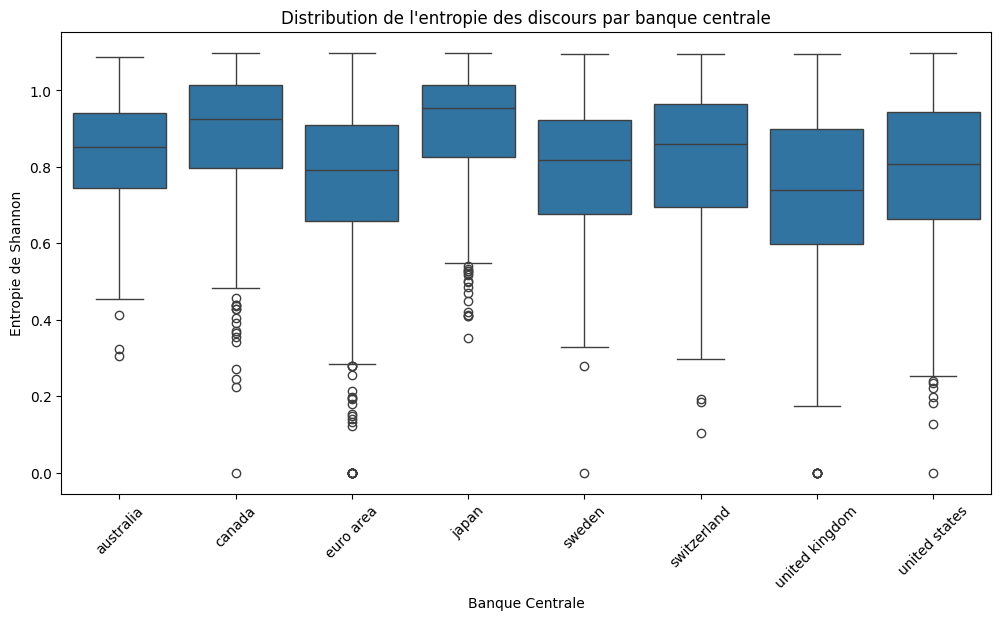

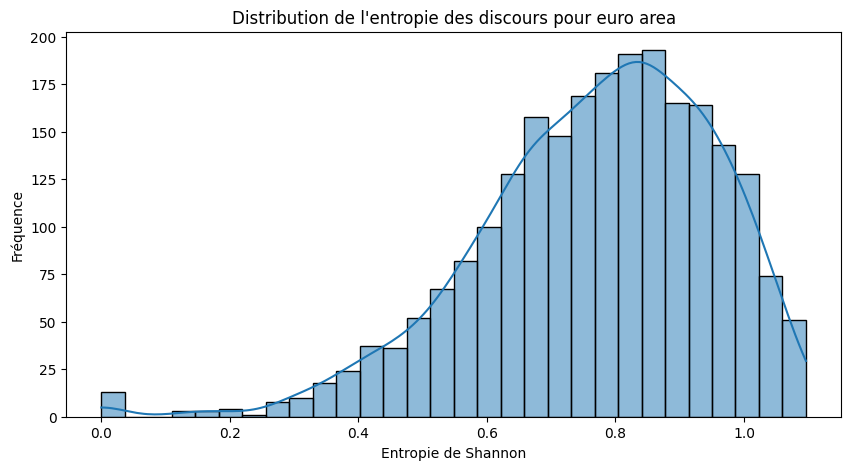

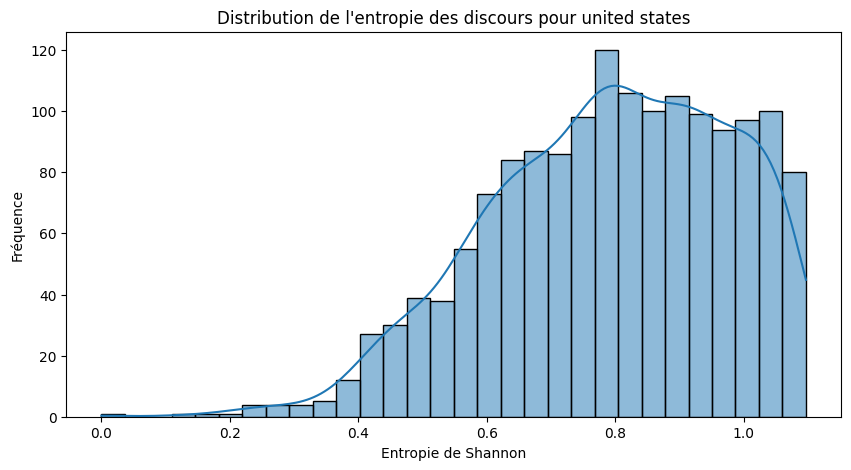

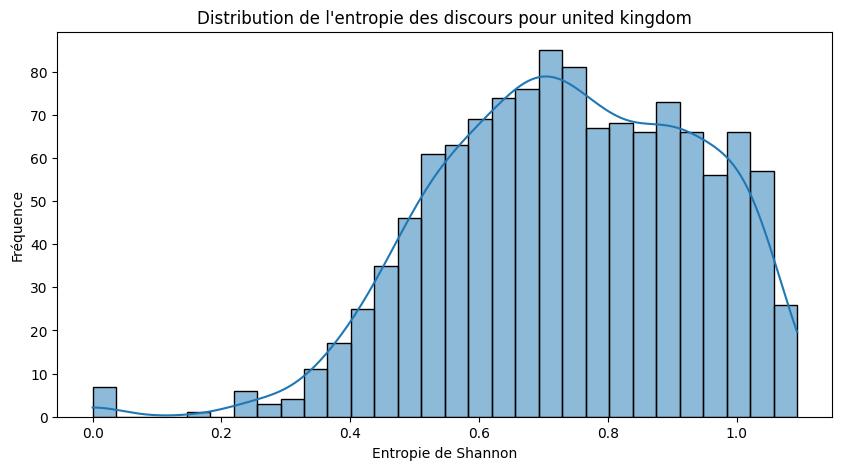

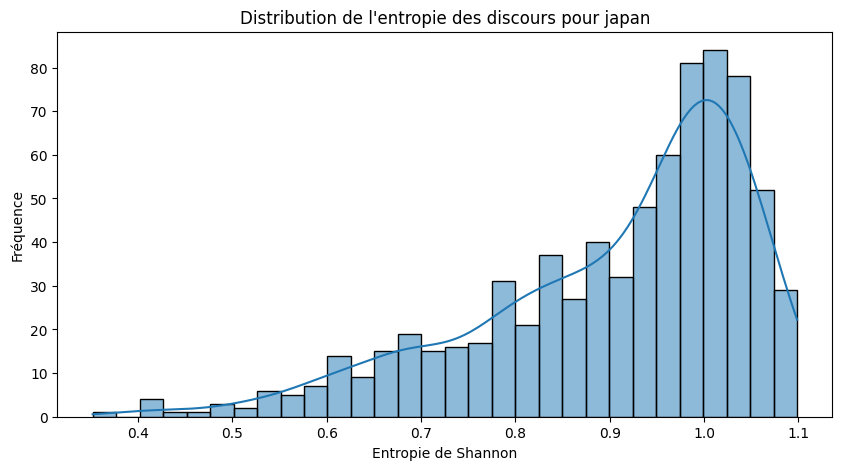

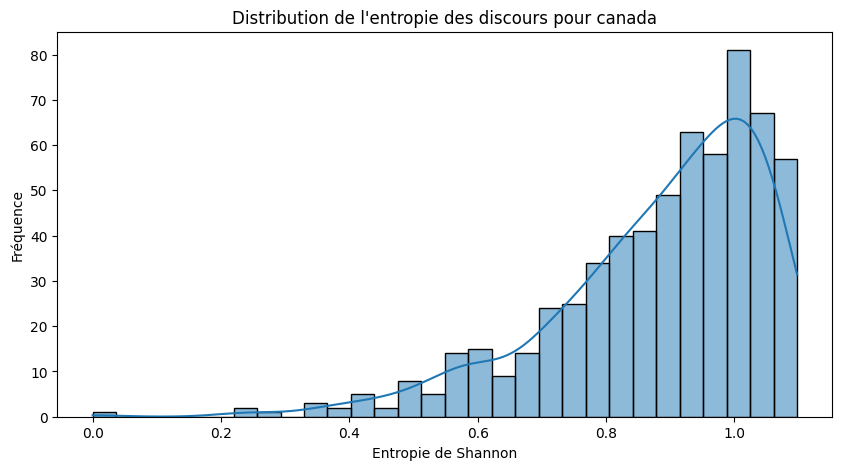

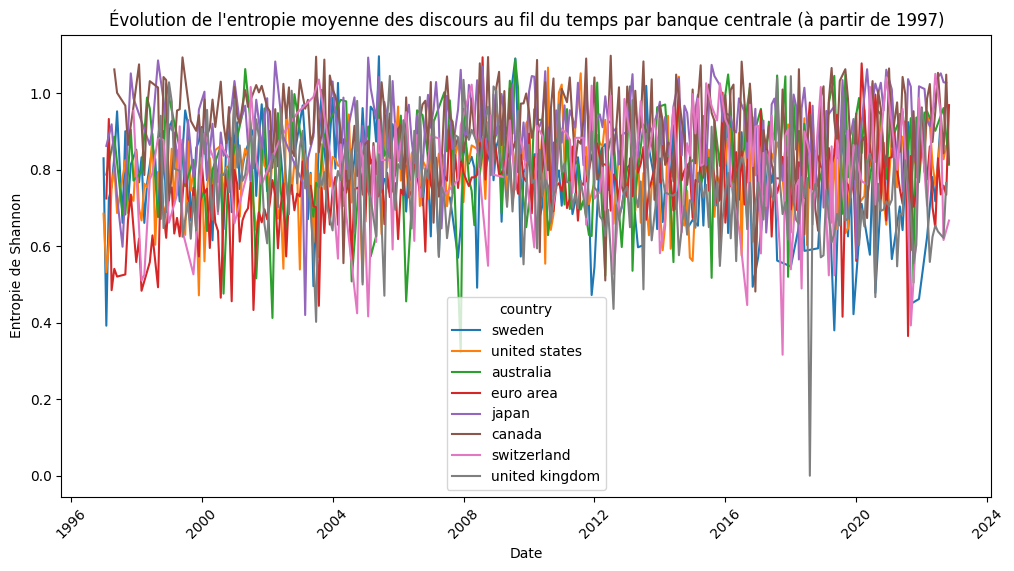

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# === 1. Charger le fichier existant ===
file_path = 'all_speeches_with_entropy_updated.csv'

try:
    data = pd.read_csv(file_path)
    print("Fichier chargé avec succès !")
except Exception as e:
    print(f"Erreur lors du chargement du fichier : {e}")

# === 2. Analyse statistique de l'entropie par banque centrale ===
summary_by_country = data.groupby('country')['sentiment_entropy'].agg(['mean', 'std', 'min', 'max', 'count'])
print("Statistiques descriptives de l'entropie par banque centrale")
print(summary_by_country)

# === 3. Visualisation des entropies par pays (boxplot) ===
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='sentiment_entropy', data=data)
plt.xticks(rotation=45)
plt.title("Distribution de l'entropie des discours par banque centrale")
plt.xlabel("Banque Centrale")
plt.ylabel("Entropie de Shannon")
plt.show()

# === 4. Visualisation de la distribution des entropies par pays (histogrammes) ===
countries_to_plot = data['country'].value_counts().index[:5]  # Prendre les 5 banques centrales avec le plus de discours
for country in countries_to_plot:
    subset = data[data['country'] == country]
    plt.figure(figsize=(10, 5))
    sns.histplot(subset['sentiment_entropy'], kde=True, bins=30)
    plt.title(f"Distribution de l'entropie des discours pour {country}")
    plt.xlabel("Entropie de Shannon")
    plt.ylabel("Fréquence")
    plt.show()

# === 5. (Optionnel) Évolution temporelle de l'entropie par banque centrale ===

data['date'] = pd.to_datetime(data['date'])

# === 3. Filtrer les discours après 1997 ===
data_filtered = data[data['date'] >= '1997-01-01']

# === 4. Calculer la moyenne de l'entropie par mois et par pays ===
monthly_entropy = data_filtered.groupby([data_filtered['date'].dt.to_period('M'), 'country'])['sentiment_entropy'].mean().reset_index()
monthly_entropy['date'] = monthly_entropy['date'].dt.to_timestamp()

# === 5. Visualiser l'évolution temporelle de l'entropie par pays ===
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sentiment_entropy', hue='country', data=monthly_entropy)
plt.title("Évolution de l'entropie moyenne des discours au fil du temps par banque centrale (à partir de 1997)")
plt.xlabel("Date")
plt.ylabel("Entropie de Shannon")
plt.xticks(rotation=45)
plt.show()

# **Analyse des Distributions des Entropies**

## **1️ Observations Générales : Distribution par Banque Centrale**
### Observations
- La **dispersion des entropies** varie significativement d'une banque centrale à l'autre :
  - Les discours de la **zone euro (Euro Area)** sont concentrés autour de 0,8, avec une dispersion relativement faible et peu d'outliers.
  - Les **États-Unis (United States)** montrent une dispersion similaire mais davantage d'outliers, avec plusieurs discours à faible entropie.
  - Le **Japon (Japan)** et le **Canada** présentent des entropies majoritairement élevées (près de 1,0), avec une queue asymétrique vers les valeurs faibles.
  - Les discours de la **Banque d'Angleterre (United Kingdom)** sont plus dispersés et légèrement asymétriques vers les entropies basses.

### Interprétations
- Une entropie élevée et concentrée, comme observée pour le Japon et le Canada, pourrait refléter des discours diversifiés, abordant une large gamme de thèmes avec une communication prudente.
- Les outliers pour les États-Unis pourraient indiquer des discours spécifiques, probablement destinés à clarifier des messages ou des décisions critiques.
- La faible dispersion en zone euro suggère une communication homogène et cohérente de la part de la BCE.

---

## **2️ Analyse par Banque Centrale : Histogrammes et Densités**
### Zone Euro (Euro Area)
#### Observations
- La distribution est **symétrique**, centrée autour de 0,8, avec très peu de discours ayant une entropie inférieure à 0,4.
- Une proportion significative des discours se situe entre 0,6 et 1,0.

#### Interprétation
- Cela reflète une communication cohérente de la BCE, avec un style stable et homogène dans les sentiments abordés. L'absence de queue significative indique que la BCE évite les discours trop spécialisés ou limités en thèmes.

---

### États-Unis (United States)
#### Observations
- La distribution est également symétrique mais légèrement plus aplatie, avec un pic centré autour de 0,75 à 0,8.
- Des discours à faible entropie (inférieure à 0,4) apparaissent plus fréquemment qu'en zone euro.

#### Interprétation
- Ces discours à faible entropie pourraient correspondre à des moments où la Fed communique des messages clairs et ciblés, par exemple lors de décisions de politique monétaire importantes. Une dispersion plus importante pourrait refléter une stratégie de communication adaptée aux conditions économiques variables.

---

### Japon (Japan)
#### Observations
- La distribution est **asymétrique**, avec une forte concentration autour de l'entropie maximale (près de 1,0) et très peu de discours en dessous de 0,5.

#### Interprétation
- Une entropie log-normale potentielle pourrait refléter une stratégie où la Banque du Japon aborde systématiquement un large éventail de sujets, adoptant ainsi une communication prudente et équilibrée. Cela pourrait être lié à des conditions économiques complexes nécessitant une approche nuancée.

---

### Canada
#### Observations
- La distribution est similaire à celle du Japon, avec une forte concentration autour de 1,0 et une asymétrie vers les valeurs faibles.

#### Interprétation
- La Banque du Canada semble adopter une stratégie similaire, où les discours couvrent une diversité de thèmes et de sentiments, tout en restant prudente et équilibrée.

---

### Royaume-Uni (United Kingdom)
#### Observations
- La distribution est centrée autour de 0,7, avec une légère asymétrie vers les valeurs faibles et une dispersion plus importante que celle de la BCE.

#### Interprétation
- Cela pourrait indiquer une stratégie de communication plus variée, alternant entre des discours larges et diversifiés (entropie élevée) et des discours plus ciblés ou spécialisés (entropie faible).

---

## **3️ Le Cas d'une Distribution Log-Normale**
### Observations
- Les distributions du **Japon** et du **Canada** montrent des caractéristiques proches d'une **log-normale** :
  - Une concentration autour de valeurs élevées (près de 1,0).
  - Une queue asymétrique vers les valeurs faibles.
- En revanche, les distributions de la **zone euro** et des **États-Unis** apparaissent plus symétriques, avec une densité qui ressemble davantage à une normale.

### Interprétation
- Une distribution log-normale pourrait refléter une communication très équilibrée, où les discours couvrent un large éventail de thèmes. Cela suggère que les banques centrales comme la Banque du Japon et la Banque du Canada optent pour une stratégie prudente et diversifiée.
- La forme plus symétrique des distributions pour la BCE et la Fed pourrait indiquer une communication plus homogène, centrée sur des messages répétitifs et clairs.

---

## **Conclusions**
1. La **zone euro** montre une entropie cohérente et homogène, probablement liée à une communication centralisée et bien contrôlée.
2. Les **États-Unis** présentent une plus grande variabilité dans les discours, ce qui pourrait refléter une adaptation aux conditions économiques changeantes.
3. Le **Japon** et le **Canada** affichent des entropies élevées et potentiellement log-normales, suggérant une approche de communication prudente et diversifiée.
4. La **Banque d'Angleterre** semble adopter une approche hybride, combinant des discours spécialisés et des messages plus larges.

Ces résultats pourraient être approfondis en comparant les paramètres des distributions log-normales entre pays ou en explorant leur corrélation avec des événements économiques spécifiques.

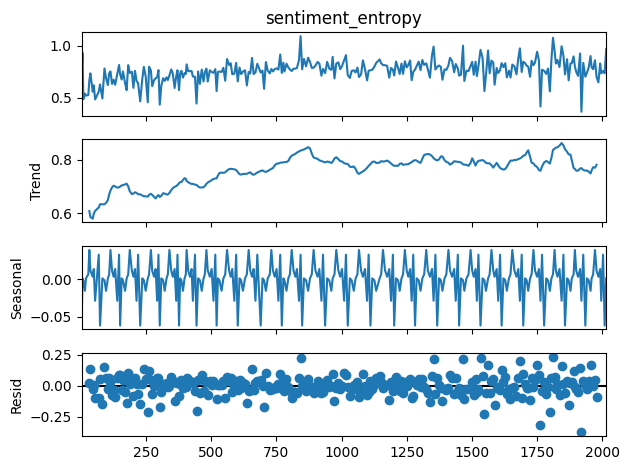

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Filtrer un pays pour décomposition (ex: Eurozone)
country_data = monthly_entropy[monthly_entropy['country'] == 'euro area']

# Décomposition des séries temporelles
result = seasonal_decompose(country_data['sentiment_entropy'], model='additive', period=12)

# Tracer la décomposition
result.plot()
plt.show()

	1.	Composante “Trend” (Tendance) :
	•	La tendance générale montre une légère augmentation de l’entropie au fil du temps, avec des fluctuations plus marquées après un certain seuil.
	•	Cela peut indiquer une augmentation de l’incertitude générale dans les discours des banques centrales sur la période analysée.
	2.	Composante “Seasonal” (Saisonnalité) :
	•	Une saisonnalité nette est visible, avec des variations périodiques bien définies.
	•	Cela confirme qu’il existe une saisonnalité régulière dans les discours, probablement liée à des cycles économiques ou aux calendriers des annonces des banques centrales.
	3.	Composante “Residual” (Résiduel) :
	•	Le résiduel montre des valeurs aléatoires autour de zéro, ce qui est attendu.
	•	Cela indique que la majorité de la variation dans les entropies est bien expliquée par la tendance et la saisonnalité.

Interpretation 	
•	Saisonnalité détectée :
	•	La saisonnalité semble stable dans son amplitude au fil du temps.
	•	Il serait intéressant de voir si cette saisonnalité correspond à des événements annuels ou trimestriels (ex. : réunions importantes, publications économiques).
	•	Évolution de l’incertitude (Trend) :
	•	L’entropie moyenne semble augmenter sur la période analysée.
	•	Cela pourrait être lié à une communication plus prudente ou plus complexe des banques centrales dans un contexte de crises financières ou d’incertitudes économiques.

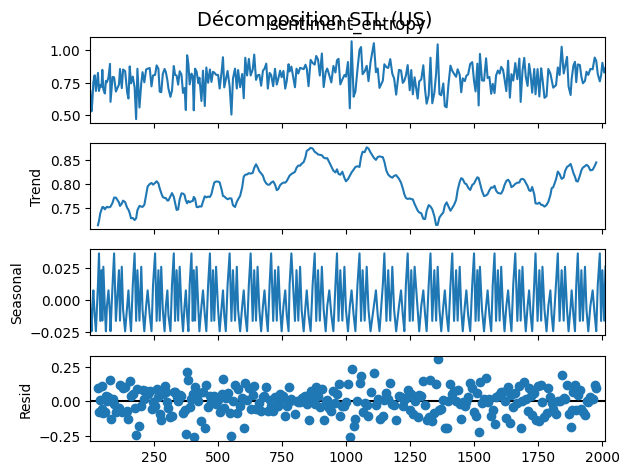

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Filtrer les données pour les États-Unis
us_data = monthly_entropy[monthly_entropy['country'] == 'united states']

# Décomposition des séries temporelles
us_result = seasonal_decompose(us_data['sentiment_entropy'], model='additive', period=12)

# Tracer la décomposition
us_result.plot()
plt.suptitle("Décomposition STL (US)", fontsize=14)
plt.show()

		•	La tendance montre une légère hausse globale de l’entropie moyenne des discours sur la période.
	•	Il y a des périodes de baisse temporaire suivies de rebonds :
	•	Exemple : Une baisse autour du milieu de la série suivie d’une remontée graduelle.
	•	Cela pourrait indiquer des phases de communication plus claire (basse entropie) suivies de périodes d’incertitude accrue.
	
	•	Une saisonnalité nette et périodique est visible :
	•	La saisonnalité semble stable en amplitude, sans changement majeur dans les variations périodiques.
	•	Cette saisonnalité pourrait correspondre à :
	•	Des cycles annuels ou trimestriels liés aux annonces programmées des banques centrales (comme les réunions trimestrielles de la Fed).
	•	Une influence des cycles économiques (inflation, chômage, etc.).

interpretation	
•	Saisonnalité :
	•	Les États-Unis et la zone euro montrent une saisonnalité similaire, indiquant que ces cycles pourraient être communs à toutes les grandes banques centrales.
	•	Tendance :
	•	La tendance des États-Unis semble plus stable avec une progression lente et régulière, contrairement à la zone euro, où des variations plus abruptes peuvent apparaître.

# **Hypothèses les plus vraisemblables sur la nature de la saisonalité**

## **1️ Hypothèse : Liens avec les calendriers des réunions des banques centrales**
- **Pourquoi c'est pertinent ?**
  - Les banques centrales comme la BCE, la Fed ou la BoJ organisent des **réunions programmées régulièrement** (mensuelles, trimestrielles) pour définir leur politique monétaire.
  - Les discours **post-réunion** sont souvent ciblés sur l'annonce des décisions prises (par exemple, taux d'intérêt, quantitative easing), ce qui pourrait réduire l'entropie.
  - Les discours **précédant ces réunions** pourraient couvrir plusieurs scénarios économiques possibles, augmentant ainsi l'entropie.

- **Relevé empirique** :
  - Cette hypothèse est testable grâce à une **corrélation entre les dates des discours** et les **calendriers de réunion** publiquement accessibles.

---

## **2️ Hypothèse : Liens avec les cycles des données macroéconomiques**
- **Pourquoi c'est pertinent ?**
  - Les banques centrales réagissent fortement aux **indicateurs économiques publiés périodiquement** (inflation, PIB, chômage).
  - Les discours **post-publication** de ces données peuvent avoir une entropie faible, car ils visent à clarifier ou commenter ces informations.
  - Les discours **avant ces publications** peuvent inclure des scénarios alternatifs ou des anticipations, augmentant ainsi l'entropie.

- **Relevé empirique** :
  - Les publications d'indicateurs clés comme l'inflation (mensuelle) ou la croissance du PIB (trimestrielle) suivent des cycles réguliers qui coïncident souvent avec les discours des banques centrales.

---

## **Pourquoi ces deux hypothèses sont les plus vraisemblables ?**
1. Elles reposent sur des **cycles institutionnels et économiques bien établis**, dont les dates et périodicités sont connues (réunions de banques centrales, publications macroéconomiques).
2. Elles permettent de tester des **corrélations claires et reproductibles** entre les dates des discours et les événements sous-jacents.
3. Les discours des banques centrales étant étroitement liés à leur mandat (stabilité des prix, croissance, emploi), ces cycles sont des moteurs évidents des fluctuations d'entropie.

---

Ces hypothèses fournissent des bases solides pour explorer et expliquer les **variations saisonnières des entropies** des discours des banques centrales.

In [67]:
print(data)

          reference        country       date  \
0      r901128a_BOA      australia 1990-11-28   
1      r911003a_BOA      australia 1991-10-03   
2      r920314a_BOA      australia 1992-03-14   
3      r920529a_BOA      australia 1992-05-29   
4      r920817a_BOA      australia 1992-08-17   
...             ...            ...        ...   
7716  r221010a_FOMC  united states 2022-10-10   
7717  r221012b_FOMC  united states 2022-10-12   
7718  r221012a_FOMC  united states 2022-10-12   
7719  r221014a_FOMC  united states 2022-10-14   
7720  r221020a_FOMC  united states 2022-10-20   

                                       sentiment_scores  sentiment_entropy  \
0     {'positive': 0.14705882352941177, 'neutral': 0...           0.842340   
1     {'positive': 0.15037593984962405, 'neutral': 0...           0.795916   
2     {'positive': 0.2426470588235294, 'neutral': 0....           0.841243   
3     {'positive': 0.21794871794871795, 'neutral': 0...           0.862563   
4     {'positive': 0.

### 1.	Créer une variable pour classer l’incertitude :
Ajouter une colonne low_uncertainty pour indiquer si l’incertitude est faible (en dessous d’un seuil, par exemple, le 30ème percentile).

In [66]:
threshold_entropy = data['sentiment_entropy'].quantile(0.3)
data['low_uncertainty'] = data['sentiment_entropy'] < threshold_entropy

In [68]:
# Transformer la colonne de date
data['date'] = pd.to_datetime(data['date'])

# ==============================
# 2. Extraction des scores de sentiment
# ==============================

# Extraire les scores de sentiment à partir de la chaîne JSON-like
data['sentiment_scores'] = data['sentiment_scores'].apply(eval)  # Convertir la chaîne de type "{'positive': 0.1, ...}" en dictionnaire

# Calculer les scores de sentiment
data['positive_score'] = data['sentiment_scores'].apply(lambda x: x.get('positive', 0))
data['negative_score'] = data['sentiment_scores'].apply(lambda x: x.get('negative', 0))
data['neutral_score'] = data['sentiment_scores'].apply(lambda x: x.get('neutral', 0))

# Calcul du sentiment net : sentiment positif - sentiment négatif
data['sentiment_net'] = data['positive_score'] - data['negative_score']

# ==============================
# 3. Identification des périodes d'incertitude faible
# ==============================

# Seuil d'entropie (U_bar) pour classifier les discours
U_bar = data['sentiment_entropy'].quantile(0.3)  # Seuil des 30% les plus bas
data['low_uncertainty'] = data['sentiment_entropy'] < U_bar

# Filtrer uniquement les périodes d'incertitude faible
low_uncertainty_data = data[data['low_uncertainty']].copy()

# ==============================
# 4. Classification des sentiments en catégories (+1, -1, 0)
# ==============================

# Paramètre epsilon pour éviter les signaux trop proches de 0
epsilon = 0.05

# Classification des catégories de sentiment
low_uncertainty_data['sentiment_category'] = 0  # Par défaut, neutre
low_uncertainty_data.loc[low_uncertainty_data['sentiment_net'] < -epsilon, 'sentiment_category'] = -1  # Négatif
low_uncertainty_data.loc[low_uncertainty_data['sentiment_net'] > epsilon, 'sentiment_category'] = 1  # Positif

# ==============================
# 5. Construction du nouveau dataset
# ==============================

# Garder uniquement les colonnes nécessaires
final_dataset = low_uncertainty_data[['date', 'country', 'sentiment_category']].copy()

# Sauvegarder le nouveau dataset en CSV
final_dataset.to_csv('filtered_low_uncertainty_dataset.csv', index=False)

# Afficher un aperçu du nouveau dataset
print(final_dataset.head())

         date    country  sentiment_category
4  1992-08-17  australia                   1
16 1994-09-26  australia                   0
17 1994-11-23  australia                   0
23 1995-09-25  australia                   1
24 1995-10-19  australia                   0


In [ ]:
# Ajout d'une moyenne mobile du sentiment net
low_uncertainty_data['sentiment_net_sma'] = low_uncertainty_data['sentiment_net'].rolling(window=5).mean()

# Re-classification des catégories de sentiment (après le filtre SMA)
low_uncertainty_data['sentiment_category'] = 0  # Neutre
low_uncertainty_data.loc[low_uncertainty_data['sentiment_net_sma'] < -epsilon, 'sentiment_category'] = -1  # Négatif
low_uncertainty_data.loc[low_uncertainty_data['sentiment_net_sma'] > epsilon, 'sentiment_category'] = 1  # Positif

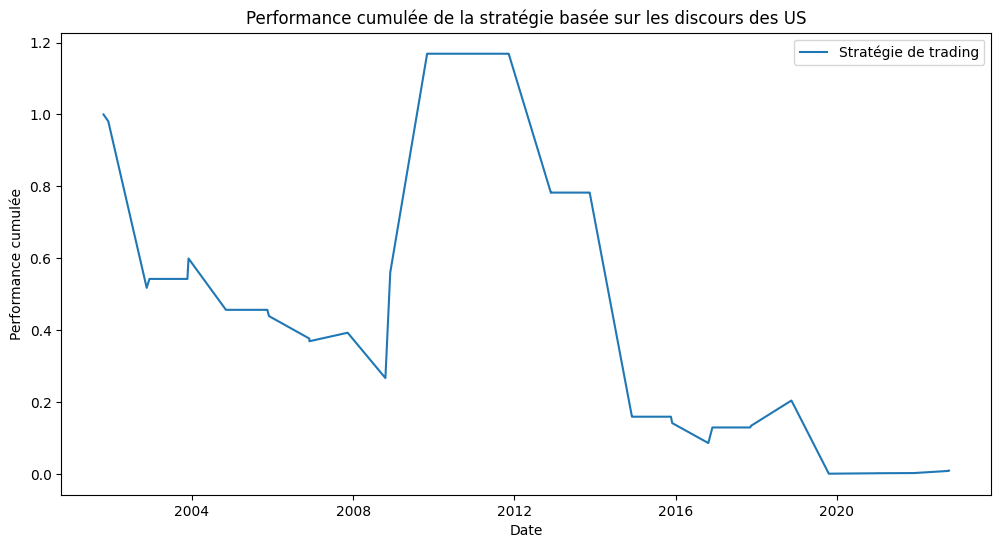

Sharpe Ratio: 2.13
Maximum Drawdown: -99.90%
         date  sentiment_category  Federal Funds Target Rate  \
8  2001-10-23                   1                   5.394737   
9  2001-12-05                   1                   5.381579   
10 2002-11-18                   1                   5.368421   
11 2002-12-13                   0                   5.355263   
12 2003-11-22                   1                   5.342105   

    Effective Federal Funds Rate  Real GDP (Percent Change)  \
8                       5.390526                   2.647368   
9                       5.376842                   2.515789   
10                      5.363158                   2.384211   
11                      5.349474                   2.252632   
12                      5.335789                   2.121053   

    Unemployment Rate  Inflation Rate  30Y_yield  30Y_yield_change  position  \
8            4.573684        2.368421     5.3810               NaN       NaN   
9            4.557895        2.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 1. Chargement des données des discours des US
# ==============================

# Charger le fichier des discours
file_path = 'all_speeches_with_entropy_updated.csv'
data = pd.read_csv(file_path)

# Filtrer uniquement les discours des US
data = data[data['country'].str.lower() == 'united states']

# Transformer la colonne de date
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Filtrer les discours avec une incertitude faible (U_t < U_bar)
U_bar = data['sentiment_entropy'].quantile(0.3)  # Seuil des 30% les plus bas
data['low_uncertainty'] = data['sentiment_entropy'] < U_bar

# Filtrer uniquement les discours à faible incertitude
low_uncertainty_data = data[data['low_uncertainty']].copy()

# Extraction des scores de sentiment
low_uncertainty_data['sentiment_scores'] = low_uncertainty_data['sentiment_scores'].apply(eval)  # Convertir JSON-like
low_uncertainty_data['positive_score'] = low_uncertainty_data['sentiment_scores'].apply(lambda x: x.get('positive', 0))
low_uncertainty_data['negative_score'] = low_uncertainty_data['sentiment_scores'].apply(lambda x: x.get('negative', 0))
low_uncertainty_data['sentiment_net'] = low_uncertainty_data['positive_score'] - low_uncertainty_data['negative_score']

# Classification des catégories de sentiment (+1, 0, -1)
epsilon = 0.05
low_uncertainty_data['sentiment_category'] = 0
low_uncertainty_data.loc[low_uncertainty_data['sentiment_net'] < -epsilon, 'sentiment_category'] = -1
low_uncertainty_data.loc[low_uncertainty_data['sentiment_net'] > epsilon, 'sentiment_category'] = 1

# Ne garder que les 2 discours les plus récents par année
low_uncertainty_data['year'] = low_uncertainty_data['date'].dt.year
low_uncertainty_data['rank'] = low_uncertainty_data.groupby('year')['date'].rank(ascending=False, method='first')
filtered_data = low_uncertainty_data[low_uncertainty_data['rank'] <= 2]

# Garder uniquement les colonnes nécessaires
filtered_data = filtered_data[['date', 'sentiment_category']]

# ==============================
# 2. Chargement des données économiques
# ==============================

index_path = 'index.csv'
index_data = pd.read_csv(index_path)

# Formater la date
index_data['date'] = pd.to_datetime(index_data[['Year', 'Month', 'Day']], errors='coerce')

# Ne garder que les colonnes importantes
index_data = index_data[['date', 'Federal Funds Target Rate', 'Effective Federal Funds Rate', 'Real GDP (Percent Change)', 'Unemployment Rate', 'Inflation Rate']]

# Interpoler les valeurs manquantes pour les données économiques
index_data = index_data.sort_values(by='date')
index_data.interpolate(method='linear', inplace=True)

# ==============================
# 3. Chargement des rendements des obligations US (30 ans)
# ==============================

yield_path = 'Treasury Yield 30 Years.csv'
yield_data = pd.read_csv(yield_path)

# Formater la date
yield_data['date'] = pd.to_datetime(yield_data['Date'], format='%m/%d/%Y', errors='coerce')

# Ne garder que la colonne de fermeture des taux d'intérêt
yield_data = yield_data[['date', 'Close']]
yield_data.rename(columns={'Close': '30Y_yield'}, inplace=True)

# Interpoler les valeurs manquantes pour les rendements
yield_data = yield_data.sort_values(by='date')
yield_data.interpolate(method='linear', inplace=True)

# ==============================
# 4. Alignement des bases de données
# ==============================

# Fusionner toutes les bases de données sur la colonne "date"
merged_data = pd.merge(filtered_data, index_data, on='date', how='left')
merged_data = pd.merge(merged_data, yield_data, on='date', how='left')

# Vérification des valeurs manquantes après fusion
merged_data.interpolate(method='linear', inplace=True)
merged_data.dropna(inplace=True)

# ==============================
# 5. Stratégie de trading
# ==============================

# Calculer les rendements des obligations (variation des taux d'intérêt à 30 ans)
merged_data['30Y_yield_change'] = merged_data['30Y_yield'].diff()

# Calculer les positions en fonction du signal de sentiment
merged_data['position'] = merged_data['sentiment_category'].shift(1)  # On prend position après le signal
merged_data['strategy_returns'] = merged_data['position'] * merged_data['30Y_yield_change']

# Remplacer les valeurs manquantes des rendements par 0
merged_data['strategy_returns'] = merged_data['strategy_returns'].fillna(0)

# Calculer les rendements cumulés
merged_data['cumulative_returns'] = (1 + merged_data['strategy_returns']).cumprod()

# ==============================
# 6. Visualisation de la performance
# ==============================

plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['cumulative_returns'], label='Stratégie de trading')
plt.title("Performance cumulée de la stratégie basée sur les discours des US")
plt.xlabel("Date")
plt.ylabel("Performance cumulée")
plt.legend()
plt.show()

# ==============================
# 7. Statistiques de performance
# ==============================

# Sharpe ratio
sharpe_ratio = merged_data['strategy_returns'].mean() / merged_data['strategy_returns'].std() * np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Maximum drawdown
cumulative_max = merged_data['cumulative_returns'].cummax()
drawdown = (merged_data['cumulative_returns'] - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")

# Afficher les premières lignes des données finales
print(merged_data.head())


In [84]:
pip install xgboost

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Classes uniques dans target : [0 1]
Accuracy: 0.6903225806451613
Confusion Matrix:
 [[106   0]
 [ 48   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82       106
           1       1.00      0.02      0.04        49

    accuracy                           0.69       155
   macro avg       0.84      0.51      0.43       155
weighted avg       0.79      0.69      0.57       155



/Users/mouradchikhi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:59:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


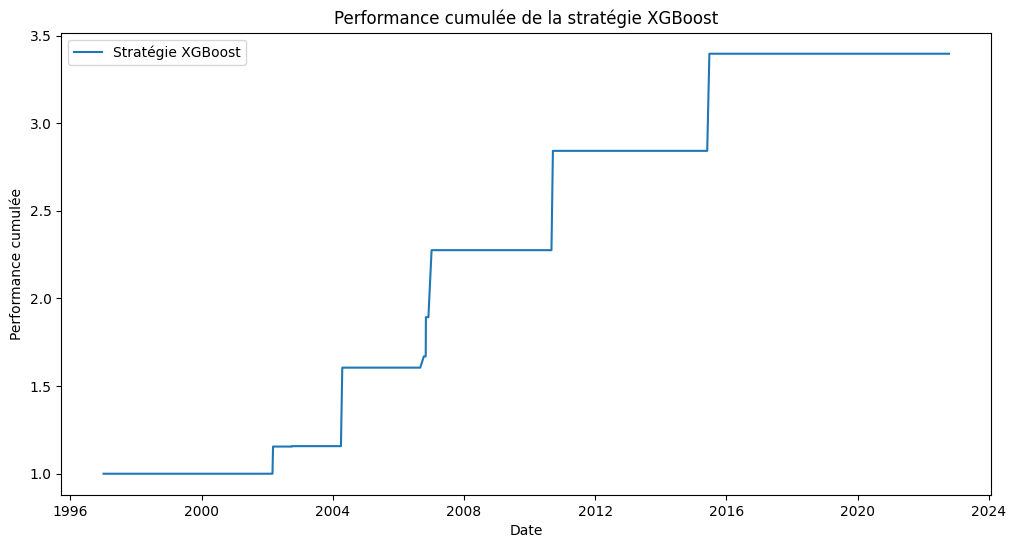

Sharpe Ratio : 1.35
Maximum Drawdown : 0.00%
          date  30Y_yield_change  prediction  position  strategy_returns
770 2022-09-28             0.000           0       0.0               0.0
771 2022-09-30             0.084           0       0.0               0.0
772 2022-10-04            -0.078           0       0.0              -0.0
773 2022-10-12             0.197           0       0.0               0.0
774 2022-10-14             0.094           0       0.0               0.0


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==============================
# 1. Chargement et préparation des données
# ==============================

# Charger les discours
file_path = 'all_speeches_with_entropy_updated.csv'
data = pd.read_csv(file_path)
data = data[data['country'].str.lower() == 'united states']
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Filtrer sur faible incertitude
U_bar = data['sentiment_entropy'].quantile(0.5)
data['low_uncertainty'] = data['sentiment_entropy'] < U_bar
low_uncertainty_data = data[data['low_uncertainty']].copy()

# Extraire le sentiment
low_uncertainty_data['sentiment_scores'] = low_uncertainty_data['sentiment_scores'].apply(eval)
low_uncertainty_data['positive_score'] = low_uncertainty_data['sentiment_scores'].apply(lambda x: x.get('positive', 0))
low_uncertainty_data['negative_score'] = low_uncertainty_data['sentiment_scores'].apply(lambda x: x.get('negative', 0))
low_uncertainty_data['sentiment_net'] = low_uncertainty_data['positive_score'] - low_uncertainty_data['negative_score']

# Sentiment category
epsilon = 0.02
low_uncertainty_data['sentiment_category'] = 0
low_uncertainty_data.loc[low_uncertainty_data['sentiment_net'] < -epsilon, 'sentiment_category'] = -1
low_uncertainty_data.loc[low_uncertainty_data['sentiment_net'] > epsilon, 'sentiment_category'] = 1

filtered_data = low_uncertainty_data[['date', 'sentiment_category']]

# Charger les taux économiques
index_data = pd.read_csv('index.csv')
index_data['date'] = pd.to_datetime(index_data[['Year', 'Month', 'Day']], errors='coerce')
index_data = index_data[['date', 'Federal Funds Target Rate', 'Effective Federal Funds Rate',
                         'Real GDP (Percent Change)', 'Unemployment Rate', 'Inflation Rate']].sort_values('date')
index_data.interpolate(method='linear', inplace=True)

# Charger les taux obligataires
yield_data = pd.read_csv('Treasury Yield 30 Years.csv')
yield_data['date'] = pd.to_datetime(yield_data['Date'], format='%m/%d/%Y', errors='coerce')
yield_data = yield_data[['date', 'Close']].rename(columns={'Close': '30Y_yield'}).sort_values('date')
yield_data.interpolate(method='linear', inplace=True)

# Fusion des datasets
merged_data = pd.merge(filtered_data, index_data, on='date', how='left')
merged_data = pd.merge(merged_data, yield_data, on='date', how='left')

# Ajouter la variation des taux d'intérêt
merged_data['30Y_yield_change'] = merged_data['30Y_yield'].diff()

# ==============================
# 2. Préparation de la Target pour XGBoost
# ==============================

# Générer la target : Sign(variation) des taux
merged_data['target'] = np.sign(merged_data['30Y_yield_change']).shift(-1)  # Prévoir la prochaine direction

# Nettoyer les NaN dans target
merged_data['target'] = merged_data['target'].fillna(0).astype(int)  # Remplacer NaN par 0
merged_data['target'] = merged_data['target'].replace({-1: 0})  # Convertir les classes : 0 -> Baisse, 1 -> Hausse

# Vérification des classes
print("Classes uniques dans target :", merged_data['target'].unique())

# ==============================
# 3. Modélisation XGBoost
# ==============================

# Features et target
features = ['sentiment_category', 'Federal Funds Target Rate', 'Effective Federal Funds Rate',
            'Real GDP (Percent Change)', 'Unemployment Rate', 'Inflation Rate']
X = merged_data[features]
y = merged_data['target']

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ==============================
# 4. Stratégie de trading avec XGBoost
# ==============================

# Prédictions sur l'ensemble des données
merged_data['prediction'] = model.predict(X)

# Position basée sur les prédictions
merged_data['position'] = merged_data['prediction'].shift(1)  # On prend position après le signal
merged_data['strategy_returns'] = merged_data['position'] * merged_data['30Y_yield_change']
merged_data['strategy_returns'] = merged_data['strategy_returns'].fillna(0)

# Calcul des rendements cumulés
merged_data['cumulative_returns'] = (1 + merged_data['strategy_returns']).cumprod()

# ==============================
# 5. Visualisation de la performance
# ==============================

plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['cumulative_returns'], label='Stratégie XGBoost')
plt.title("Performance cumulée de la stratégie XGBoost")
plt.xlabel("Date")
plt.ylabel("Performance cumulée")
plt.legend()
plt.show()

# Sharpe Ratio
sharpe_ratio = merged_data['strategy_returns'].mean() / merged_data['strategy_returns'].std() * np.sqrt(252)
print(f"Sharpe Ratio : {sharpe_ratio:.2f}")

# Maximum Drawdown
cumulative_max = merged_data['cumulative_returns'].cummax()
drawdown = (merged_data['cumulative_returns'] - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()
print(f"Maximum Drawdown : {max_drawdown:.2%}")

# Afficher un aperçu des résultats
print(merged_data[['date', '30Y_yield_change', 'prediction', 'position', 'strategy_returns']].tail())


🕒 **Time Split 1/5**
Accuracy on test set: 0.66
Sharpe Ratio for split 1: nan
Maximum Drawdown for split 1: 0.00%

🕒 **Time Split 2/5**
Accuracy on test set: 0.56
Sharpe Ratio for split 2: 1.40
Maximum Drawdown for split 2: 0.00%

🕒 **Time Split 3/5**
Accuracy on test set: 0.70
Sharpe Ratio for split 3: 1.40
Maximum Drawdown for split 3: 0.00%

🕒 **Time Split 4/5**
Accuracy on test set: 0.53
Sharpe Ratio for split 4: 1.70
Maximum Drawdown for split 4: 0.00%

🕒 **Time Split 5/5**
Accuracy on test set: 0.52
Sharpe Ratio for split 5: nan
Maximum Drawdown for split 5: 0.00%


/Users/mouradchikhi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:49:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/var/folders/nk/b2qh3mjd1fbbv82_5r4mxqf00000gn/T/ipykernel_3988/293799559.py:55: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio = strategy_returns.mean() / strategy_returns.std() * np.sqrt(252)
/Users/mouradchikhi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:49:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mouradchikhi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:49:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

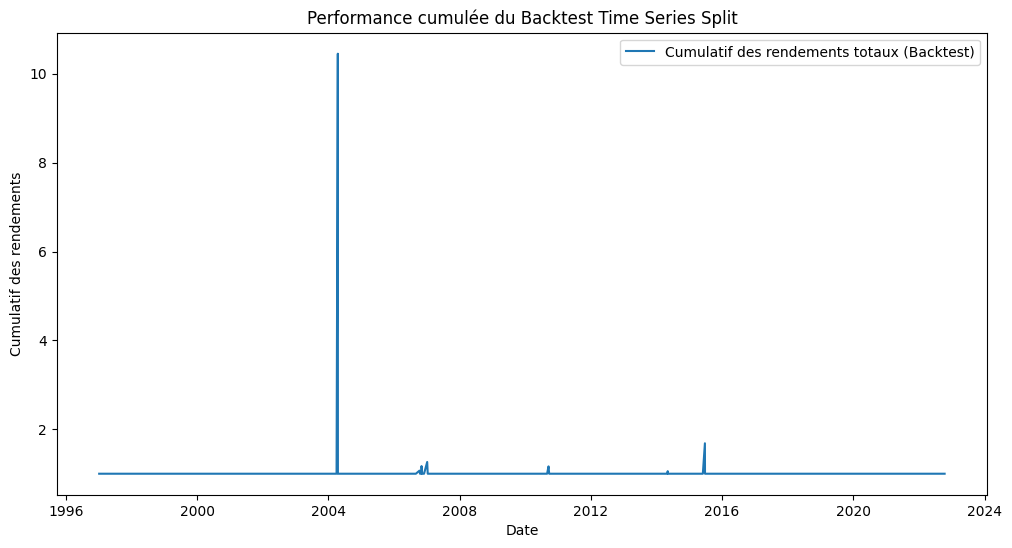

🌟 **Performance du backtest Time Series Split** 🌟
Sharpe Ratio global : nan
Maximum Drawdown global : 0.00%


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==============================
# 6. Backtest avec Time Series Split
# ==============================

# Initialisation du backtest
n_splits = 5  # Nombre de splits de la série temporelle
tscv = TimeSeriesSplit(n_splits=n_splits)

# Les features et la target
X = merged_data[features]
y = merged_data['target']

# Initialisation des métriques de performance
cumulative_returns_total = np.ones(len(merged_data))
all_sharpe_ratios = []
all_drawdowns = []

# Boucle sur les Time Series Splits
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\n🕒 **Time Split {i+1}/{n_splits}**")
    
    # Diviser les données en train et test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entraînement du modèle
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    
    # Prédictions sur la période de test
    y_pred = model.predict(X_test)
    print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.2f}")
    
    # Stocker les prédictions sur la période de test
    merged_data.loc[test_index, 'prediction'] = y_pred

    # Calcul des positions de trading
    merged_data.loc[test_index, 'position'] = merged_data.loc[test_index, 'prediction'].shift(1)
    merged_data['strategy_returns'] = merged_data['position'] * merged_data['30Y_yield_change']
    merged_data['strategy_returns'] = merged_data['strategy_returns'].fillna(0)
    
    # Calculer les rendements cumulés de la stratégie
    merged_data['cumulative_returns'] = (1 + merged_data['strategy_returns']).cumprod()
    cumulative_returns_total = cumulative_returns_total * (1 + merged_data['strategy_returns'])
    
    # Calcul du Sharpe Ratio
    strategy_returns = merged_data.loc[test_index, 'strategy_returns']
    sharpe_ratio = strategy_returns.mean() / strategy_returns.std() * np.sqrt(252)
    all_sharpe_ratios.append(sharpe_ratio)
    
    # Calcul du Maximum Drawdown (MDD)
    cumulative_max = merged_data.loc[test_index, 'cumulative_returns'].cummax()
    drawdown = (merged_data.loc[test_index, 'cumulative_returns'] - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()
    all_drawdowns.append(max_drawdown)
    
    print(f"Sharpe Ratio for split {i+1}: {sharpe_ratio:.2f}")
    print(f"Maximum Drawdown for split {i+1}: {max_drawdown:.2%}")

# ==============================
# 7. Résultats globaux du backtest
# ==============================

# Affichage de la performance globale
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], cumulative_returns_total, label='Cumulatif des rendements totaux (Backtest)')
plt.title("Performance cumulée du Backtest Time Series Split")
plt.xlabel("Date")
plt.ylabel("Cumulatif des rendements")
plt.legend()
plt.show()

# Résumé des statistiques de performance
global_sharpe_ratio = np.mean(all_sharpe_ratios)
global_max_drawdown = np.min(all_drawdowns)

print(f"🌟 **Performance du backtest Time Series Split** 🌟")
print(f"Sharpe Ratio global : {global_sharpe_ratio:.2f}")
print(f"Maximum Drawdown global : {global_max_drawdown:.2%}")

/var/folders/nk/b2qh3mjd1fbbv82_5r4mxqf00000gn/T/ipykernel_3988/2682250104.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.20995443131322397' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_data.loc[i, 'pnl'] = pnl


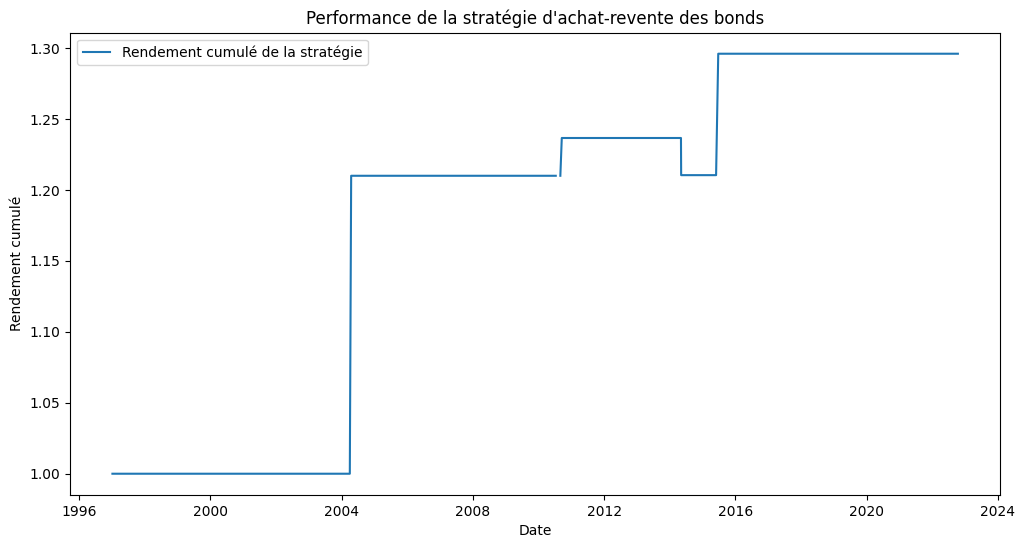

Sharpe Ratio : 0.72
Maximum Drawdown : 2.62%


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# 1. Configuration de la stratégie
# ==============================
holding_period = 5  # Nombre de jours de détention du bond
take_profit = 0.02  # Prendre profit si on atteint +2% de rendement
stop_loss = -0.02  # Stop-loss si la perte atteint -2%

# ==============================
# 2. Initialisation des colonnes de signaux
# ==============================
merged_data['position'] = 0  # Position actuelle (1 = long, 0 = neutre)
merged_data['entry_price'] = np.nan  # Prix d'achat
merged_data['exit_price'] = np.nan  # Prix de vente
merged_data['holding_period'] = 0  # Nombre de jours de détention
merged_data['pnl'] = 0  # P&L réalisé

# ==============================
# 3. Boucle sur les dates pour simuler la stratégie
# ==============================
position_open = False  # Si on est en position (True) ou non (False)
entry_price = 0  # Prix d'entrée
holding_days = 0  # Nombre de jours en position

for i in range(len(merged_data)):
    signal = merged_data.loc[i, 'prediction']
    current_price = merged_data.loc[i, '30Y_yield']
    
    # === Signal d'achat (ouvrir une position) ===
    if signal == 1 and not position_open:  # Signal d'achat
        position_open = True
        entry_price = current_price  # On enregistre le prix d'achat
        merged_data.loc[i, 'position'] = 1  # On prend position
        merged_data.loc[i, 'entry_price'] = entry_price
        holding_days = 0  # On réinitialise le nombre de jours de détention

    # === Gestion de la position (sortie) ===
    if position_open:
        # Calcul du profit actuel
        profit = (current_price - entry_price) / entry_price
        
        # Augmenter la durée de détention
        holding_days += 1
        merged_data.loc[i, 'holding_period'] = holding_days

        # === Conditions de sortie de la position ===
        if holding_days >= holding_period or profit >= take_profit or profit <= stop_loss:
            # Vendre le bond (fermeture de la position)
            merged_data.loc[i, 'exit_price'] = current_price  # On enregistre le prix de sortie
            pnl = (current_price - entry_price) / entry_price  # P&L réalisé
            merged_data.loc[i, 'pnl'] = pnl
            position_open = False  # On ferme la position
            entry_price = 0  # On réinitialise l'entrée

# ==============================
# 4. Calcul des rendements cumulés
# ==============================
# Supprimer les lignes sans P&L (pas de position fermée)
merged_data['cumulative_returns'] = (1 + merged_data['pnl']).cumprod()

# ==============================
# 5. Visualisation de la performance
# ==============================
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['cumulative_returns'], label='Rendement cumulé de la stratégie')
plt.title("Performance de la stratégie d'achat-revente des bonds")
plt.xlabel("Date")
plt.ylabel("Rendement cumulé")
plt.legend()
plt.show()

# ==============================
# 6. Statistiques de performance
# ==============================
sharpe_ratio = merged_data['pnl'].mean() / merged_data['pnl'].std() * np.sqrt(252)
max_drawdown = (merged_data['cumulative_returns'].cummax() - merged_data['cumulative_returns']).max()

print(f"Sharpe Ratio : {sharpe_ratio:.2f}")
print(f"Maximum Drawdown : {max_drawdown:.2%}")

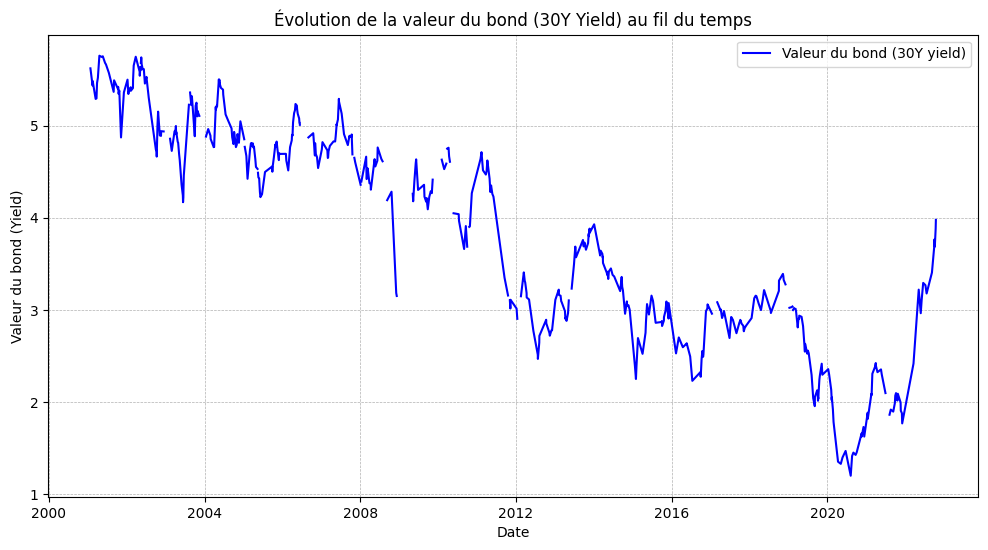

In [107]:
import matplotlib.pyplot as plt

# ==============================
# 1. Visualisation de la valeur du bond au fil du temps
# ==============================
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['30Y_yield'], label='Valeur du bond (30Y yield)', color='blue')
plt.title("Évolution de la valeur du bond (30Y Yield) au fil du temps")
plt.xlabel("Date")
plt.ylabel("Valeur du bond (Yield)")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

🔍 **Régression pour le bond 5Y_yield_change** 🔍
R-squared : 0.0007
Coefficients : 
const                -0.005520
sentiment_category    0.006883
dtype: float64

P-values : 
const                 0.574765
sentiment_category    0.509713
dtype: float64

--------------------------------------------------
🔍 **Régression pour le bond 10Y_yield_change** 🔍
R-squared : 0.0030
Coefficients : 
const                -0.010806
sentiment_category    0.013553
dtype: float64

P-values : 
const                 0.251189
sentiment_category    0.175139
dtype: float64

--------------------------------------------------
🔍 **Régression pour le bond 30Y_yield_change** 🔍
R-squared : 0.0063
Coefficients : 
const                -0.014278
sentiment_category    0.017959
dtype: float64

P-values : 
const                 0.097849
sentiment_category    0.049867
dtype: float64

--------------------------------------------------

🔍 **Comparaison des R² pour chaque bond** 🔍
                 R-squared
30Y_yield_change  0.

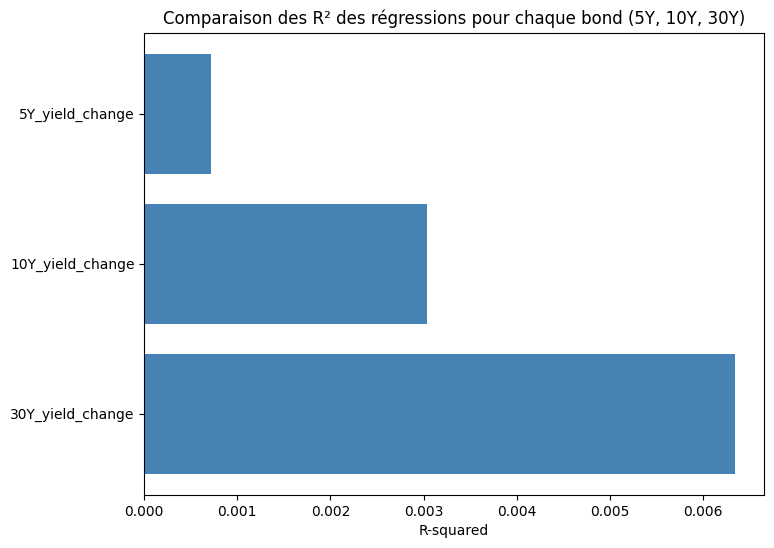

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ==============================
# 1. Charger les rendements des bonds 5Y et 10Y et les fusionner avec merged_data
# ==============================

# Charger les taux obligataires pour 5 ans
yield_5Y = pd.read_csv('Treasury Yield 5 Years.csv')
yield_5Y['date'] = pd.to_datetime(yield_5Y['Date'], format='%m/%d/%Y', errors='coerce')
yield_5Y = yield_5Y[['date', 'Close']].rename(columns={'Close': '5Y_yield'}).sort_values('date')
yield_5Y.interpolate(method='linear', inplace=True)  # Interpoler les valeurs manquantes

# Charger les taux obligataires pour 10 ans
yield_10Y = pd.read_csv('Treasury Yield 10 Years.csv')
yield_10Y['date'] = pd.to_datetime(yield_10Y['Date'], format='%m/%d/%Y', errors='coerce')
yield_10Y = yield_10Y[['date', 'Close']].rename(columns={'Close': '10Y_yield'}).sort_values('date')
yield_10Y.interpolate(method='linear', inplace=True)  # Interpoler les valeurs manquantes

# Fusionner avec merged_data existant
merged_data = pd.merge(merged_data, yield_5Y, on='date', how='left')
merged_data = pd.merge(merged_data, yield_10Y, on='date', how='left')

# Supprimer les lignes avec des NaN après la fusion
merged_data.dropna(subset=['5Y_yield', '10Y_yield', '30Y_yield'], inplace=True)

# ==============================
# 2. Calculer les variations T+1 des rendements (5Y, 10Y, 30Y)
# ==============================

# Calcul des variations T+1 pour chaque rendement
merged_data['5Y_yield_change'] = merged_data['5Y_yield'].diff().shift(-1)
merged_data['10Y_yield_change'] = merged_data['10Y_yield'].diff().shift(-1)
merged_data['30Y_yield_change'] = merged_data['30Y_yield'].diff().shift(-1)

# Supprimer les NaN générés par le shift
merged_data.dropna(subset=['5Y_yield_change', '10Y_yield_change', '30Y_yield_change'], inplace=True)

# ==============================
# 3. Régression linéaire de la variation de rendement sur sentiment_category
# ==============================

# Liste des rendements à analyser
bonds = ['5Y_yield_change', '10Y_yield_change', '30Y_yield_change']

# Dictionnaire pour stocker les résultats de la régression
regression_results = {}

for bond in bonds:
    # 1. Préparer X (sentiment_category) et y (changement de rendement)
    X = merged_data[['sentiment_category']]
    y = merged_data[bond]
    
    # 2. Ajouter une constante pour l'intercept
    X = sm.add_constant(X)
    
    # 3. Régression linéaire
    model = sm.OLS(y, X).fit()
    regression_results[bond] = {
        'R-squared': model.rsquared,
        'P-values': model.pvalues.to_dict(),
        'Coefficients': model.params.to_dict()
    }
    
    # Affichage des résultats
    print(f"🔍 **Régression pour le bond {bond}** 🔍")
    print(f"R-squared : {model.rsquared:.4f}")
    print(f"Coefficients : \n{model.params}\n")
    print(f"P-values : \n{model.pvalues}\n")
    print("-" * 50)

# ==============================
# 4. Comparaison des R² des régressions
# ==============================

# Afficher les R² des régressions pour chaque bond
r_squared_df = pd.DataFrame(regression_results).T[['R-squared']]
r_squared_df.sort_values(by='R-squared', ascending=False, inplace=True)

# Affichage des R²
print("\n🔍 **Comparaison des R² pour chaque bond** 🔍")
print(r_squared_df)

# ==============================
# 5. Visualisation des R²
# ==============================

plt.figure(figsize=(8, 6))
plt.barh(r_squared_df.index, r_squared_df['R-squared'], color='steelblue')
plt.xlabel('R-squared')
plt.title('Comparaison des R² des régressions pour chaque bond (5Y, 10Y, 30Y)')
plt.show()

## ETUDE INTRA NATIONAL : LE CAS DES US

                                 OLS Regression Results                                 
Dep. Variable:     Effective Federal Funds Rate   R-squared:                       0.543
Model:                                      OLS   Adj. R-squared:                  0.467
Method:                           Least Squares   F-statistic:                     7.134
Date:                          Tue, 10 Dec 2024   Prob (F-statistic):           0.000621
Time:                                  12:19:15   Log-Likelihood:                -47.516
No. Observations:                            29   AIC:                             105.0
Df Residuals:                                24   BIC:                             111.9
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

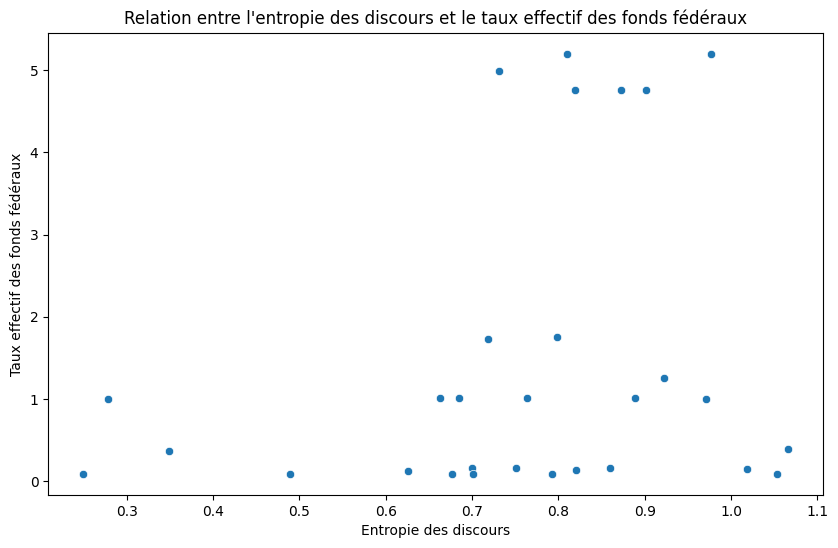

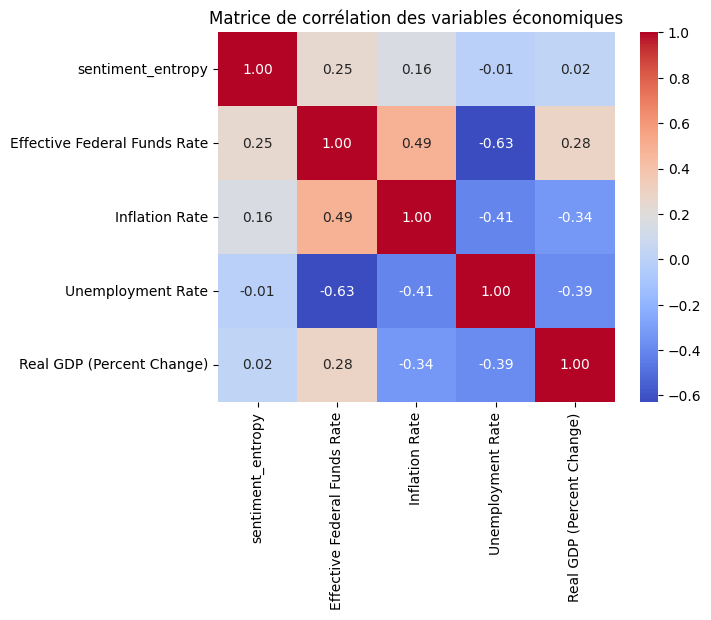

In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Charger les données ===
# Charger les entropies des discours et les données économiques de la Fed
entropy_file_path = 'all_speeches_with_entropy_updated.csv'
fed_rate_file_path = 'index.csv'

fed_entropy_data = pd.read_csv(entropy_file_path)
fed_rate_data = pd.read_csv(fed_rate_file_path)

# === 2. Préparation des données ===
# Nettoyage des noms de colonnes
fed_entropy_data.columns = fed_entropy_data.columns.str.strip()
fed_rate_data.columns = fed_rate_data.columns.str.strip()

# Conversion des colonnes date
fed_entropy_data['date'] = pd.to_datetime(fed_entropy_data['date'], errors='coerce')
fed_rate_data['date'] = pd.to_datetime(fed_rate_data[['Year', 'Month', 'Day']], errors='coerce')

# Sélection des colonnes importantes
columns_to_keep = ['date', 'Effective Federal Funds Rate', 'Inflation Rate', 'Unemployment Rate', 'Real GDP (Percent Change)']
fed_rate_data = fed_rate_data[columns_to_keep]

# Fusionner les deux fichiers
merged_data = pd.merge(fed_entropy_data, fed_rate_data, on='date', how='left')

# === 3. Vérification et nettoyage des données ===
# Conversion des colonnes pertinentes en nombres
merged_data['sentiment_entropy'] = pd.to_numeric(merged_data['sentiment_entropy'], errors='coerce')
merged_data['Effective Federal Funds Rate'] = pd.to_numeric(merged_data['Effective Federal Funds Rate'], errors='coerce')
merged_data['Inflation Rate'] = pd.to_numeric(merged_data['Inflation Rate'], errors='coerce')
merged_data['Unemployment Rate'] = pd.to_numeric(merged_data['Unemployment Rate'], errors='coerce')
merged_data['Real GDP (Percent Change)'] = pd.to_numeric(merged_data['Real GDP (Percent Change)'], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes
cleaned_data = merged_data[['sentiment_entropy', 'Effective Federal Funds Rate', 
                            'Inflation Rate', 'Unemployment Rate', 'Real GDP (Percent Change)']].dropna()

# === 4. Modèle économétrique ===
# Définir les variables explicatives (X) et la variable cible (y)
X = cleaned_data[['sentiment_entropy', 'Inflation Rate', 'Unemployment Rate', 'Real GDP (Percent Change)']]
X = sm.add_constant(X)  # Ajouter une constante (l'intercept)
y = cleaned_data['Effective Federal Funds Rate']

# Effectuer la régression
model = sm.OLS(y, X).fit()

# Résumé de la régression
print(model.summary())

# === 5. Visualisation des relations ===
# Scatterplot entre sentiment_entropy et taux d'intérêt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment_entropy', y='Effective Federal Funds Rate', data=cleaned_data)
plt.title("Relation entre l'entropie des discours et le taux effectif des fonds fédéraux")
plt.xlabel("Entropie des discours")
plt.ylabel("Taux effectif des fonds fédéraux")
plt.show()

# Corrélations entre les variables
correlation_matrix = cleaned_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables économiques")
plt.show()